### **Note** : 

### - The code is sourced from [this article](https://towardsdatascience.com/python-for-art-fast-neural-style-transfer-using-tensorflow-2-d5e7662061be) on Towards Data Science
### - Comments on the code below and modifications in the streamlit version were made by me

<br>

In [ ]:
! pip install matplotlib numpy TensorFlow tensorflow_hub pillow

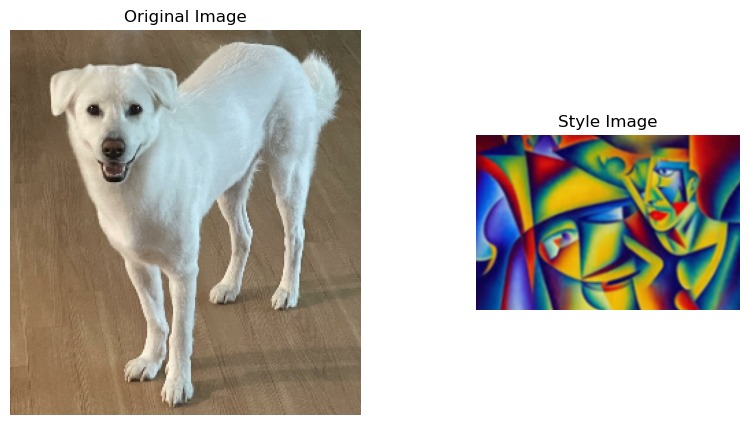

In [1]:
from matplotlib import gridspec
import matplotlib.pylab as plt
import numpy as np
import tensorflow as tf
import tensorflow_hub as tf_hub
import PIL

# Function to load an image and resize it
def load_image(image_path, image_size=(512, 256)):
    # decode the image from the specified path using TensorFlow's decode_image function 
    # convert the image to a tensor with an additional dimension using [tf.newaxis, ...]
    img = tf.io.decode_image(
        tf.io.read_file(image_path),
        channels=3, dtype=tf.float32)[tf.newaxis, ...]
    # Resize the image while preserving its aspect ratio
    img = tf.image.resize(img, image_size, preserve_aspect_ratio=True)
    return img

# Function to visualize images
def visualize(images, titles=('',)):
    # Determine the number of images and their sizes
    noi = len(images)
    image_sizes = [image.shape[1] for image in images]
    # Calculate the width of each image to adjust figure size
    w = (image_sizes[0] * 6) // 320
    # Create a figure to display the images
    plt.figure(figsize=(w * noi, w))
    # Create a grid for arranging subplots
    grid_look = gridspec.GridSpec(1, noi, width_ratios=image_sizes)
    
    for i in range(noi):
        # Add a subplot to the grid
        plt.subplot(grid_look[i])
        # Display the image with equal aspect ratio
        plt.imshow(images[i][0], aspect='equal')
        plt.axis('off')  # Turn off axis labels
        plt.title(titles[i])  # Set the subplot title
        plt.savefig("final.jpg")  # Save the figure as "final.jpg"
    plt.show()

# Load the original and style images
original_image = load_image("C:/data/NST1.jpg")
style_image = load_image("C:/data/NST2.jpg")

# Apply average pooling to the style image
style_image = tf.nn.avg_pool(style_image, ksize=[3,3], strides=[1,1], padding='VALID')

# Visualize the original and style images
visualize([original_image, style_image], ['Original Image', 'Style Image'])

### - We will stylize the original image on the left using the style from the image on the right

<br>

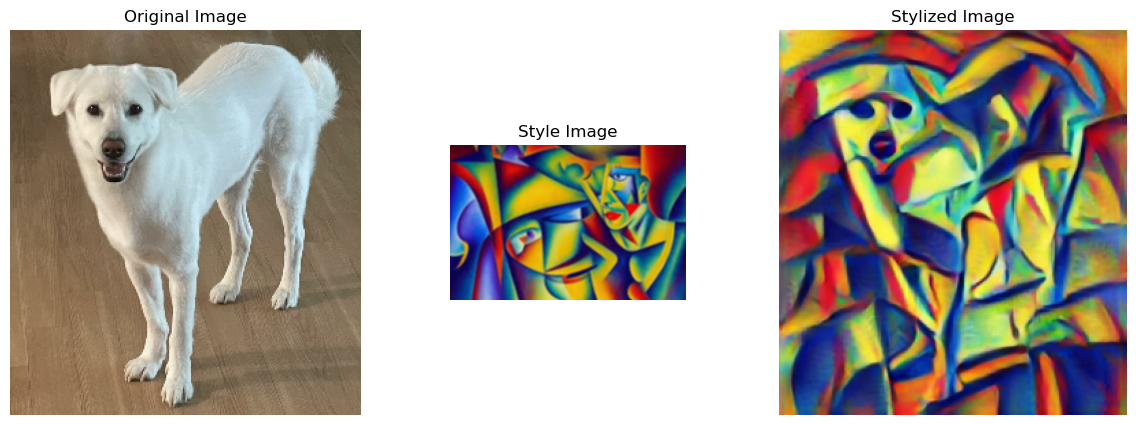

In [2]:
# Load the pre-trained stylization model from TensorFlow Hub
stylize_model = tf_hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')

# Apply stylization to the images
results = stylize_model(tf.constant(original_image), tf.constant(style_image))
stylized_image = results[0]

# Visualize the original, style, and stylized images
visualize([original_image, style_image, stylized_image], titles=['Original Image', 'Style Image', 'Stylized Image'])

### - Voila! 